# Abstract

We introduce the Python package *ecophylo* dedicated to coalescent-based simulation of eco-evolutionary dynamics. Species assemblages and their shared ancestry can be simulated by jointly taking into account the influence of past demographic fluctuations and extinctions along with how divergent genotypes have introduced new species over time through speciation.

The shared co-ancestry of present individuals is simulated backward in time using coalescent theory. Speciation events are then sprinkled over the simulated genealogy conditionally to its topology and branch lengths. The phylogenetic relationships amongst individuals and their abundances are finally obtained by merging paraphyletic clades into single species. Coalescent reconstruction of the genealogy of individuals can be simulated to represent past demographic fluctuations due to varying habitat availability, or include multiple communities linked by migration events.

The package includes tools to simulate large numbers of datasets and associated summary statistics, so that Approximate Bayesian Computation methods can be used to estimate parameter values of these processes.. Diverse patterns of taxonomic and phylogenetic compositions can be generated. The first version of the package allows simulating neutral coalescent genealogies, and will incorporate further non-neutral eco-evolutionary scenarios in future. The package can be used to explore how past demographic fluctuations have affected species abundances and phylogenetic relationships, and to estimate the parameters of these processes based on observed patterns. We provide step by step examples in both Python and R languages.

Key-words: eco-evolutionary modelling; community phylogeny; coalescent; demographic stochasticity, ecological drift, extinction-speciation dynamics

# Introduction
Observed species distributions and biodiversity patterns are shaped by current ecological processes but also reflect the influence of past evolutionary and biogeographic dynamics (Svenning 2015). For instance, alternating periods of contraction and expansion of suitable environmental conditions should affect both demographic (Avise 2009) and diversification dynamics over time (Barthelemy et al. Frontiers 2021, Lewitus and Morlon 2018 ).  Hence, a fundamental goal of biogeography is to understand how changes in suitable environmental conditions due to past climatic and geomorphologic history have shaped biodiversity patterns observed at present (Bennett 1990). Historical biogeography typically investigates how species appear, go extinct and migrate, without considering the role of demography and community assembly dynamics over time (e.g., Yu, Harris & He, 2010). Conversely, population genetics and phylogeography emphasize the joint role of migration, mutation and drift in driving patterns of population genetic diversity in space and time (Avise, 2009). Specifically, comparative phylogeographic approaches aim to grasp congruent or differing influence of past historical events led by environmental fluctuations on several co-occurring taxa (Arbogast and Kenagy 2001, Swenson 2019, Overcast et al. 2019, 2020). Concurrently, the neutral theory of biogeography has underlined the role of migration, speciation and drift in shaping patterns of taxonomic diversity in space and time (Hubbell, 2001). Integrative modeling approaches are still needed to bridge the gap between phylogeography and historical biogeography,  in order to better understand biodiversity dynamics at multiple spatial and temporal scales (Lexer et al 2013).

However, most approaches investigating how intertwined ecological and evolutive forces shape the relative abundances of species  have assumed an equilibrium state of biodiversity at present. Specifically, the neutral theory of biodiversity (Hubbell 2001) defines the fundamental biodiversity number θ as equal to 2·Jm·ν (with Jm the regional assemblage size and ν the speciation rate per lineage per generation), which has been estimated for various biomes across the globe (Jabot and Chave 2008, Etienne et al. 2006). However, this number assumes that Jm has been constant from present backward, until all lineages coalesced into their Most Recent Common Ancestor (MRCA) (Etienne et al. (2004, 2005)). Yet, in the case where past environmental variations (especially climate) have caused the sizes of communities to fluctuate over time, these should have affected ecological drift dynamics. In the case where these fluctuations occur rapidly compared to the expected time-to-equilibrium of speciation, migration and drift dynamics (for instance with long-lived organisms with slow population dynamics), we expect that current biodiversity patterns should retain the signature of past environmental fluctuations. Thus by allowing Jm to vary at specific ages of the past we can relax this consistency assumption  and account for the discordance of demographic histories between distinct regional species pools. Moreover, phylogenetic diversity can increase with diversification rates, ie. the outcome of extinction and speciation, which depend on larger geological events (Alroy 2008). Also, over longer time scales, the ability of species to cross biogeographic borders and migrate to a given region can increase the phylogenetic diversity of the regional pool (Pennington 2004). Hence, past environmental fluctuations and biogeographic events of diversification and migration have jointly influenced the evolutionary trajectory of communities. Here we propose a novel simulation-based approach in which we consider how assembly dynamics in temporally changing environments (ecological perspective) affect speciation and extinction dynamics over a long-term (evolutionary perspective), depending on environmental changes over time.

We expose here the logic and advantages of the approach to examine how past multi-species non-equilibrium dynamics have shaped patterns of taxonomic and phylogenetic diversity. We show how the package can be used to design in silico experiments (Zurell 2010) to address the possible outcome of (meta)community models. Simulating ecological communities and the phylogenetic diversity within and between assemblages according to different scenarios can help establish a benchmark against which to infer the signatures of community-wide past biogeographic processes from the resulting patterns of taxonomic and phylogenetic diversity. The initial version of the method presented here is suited to the simulation of neutral eco-evolutionary dynamics, but future versions will allow further deviation from neutrality. The package includes options to simulate large numbers of datasets over broad ranges of parameters and scenarios of past demographic events and fluctuations. These methods are destined to be used alongside ABC methods so as to estimate parameters of past demographic fluctuation from the observation of actual patterns of diversity (Csillery et al 2015).

# Core simulation algorithm in ecophylo.simulate 
## Coalescent-based simulation of assemblage genealogies

The core model rests on the fundamental hypothesis that fluctuations in the relative species abundances in a given habitat over time are driven by neutral population dynamics, depending on the size of the assemblage (Hubbell, 2001). Following the Wright-Fisher model, we assume that all individuals shrunk to their haplotypes can reproduce freely within the assemblage, and with equal fitness (neutral assumption). The dynamics of the assemblage they form can be represented by coalescence, i.e. by tracing the shared co-ancestry of extant individuals backwards in time until a single common ancestor is found (Kingman 1982). Generations in the model are discrete and non-overlapping, and a single coalescence event can happen at a given generation. We can thus simulate the shared co-ancestry of n sampled individuals observed at present time in a local assemblage, using a backward simulation of the coalescent tree. Coalescence is an event such as two lineages at generation t share the same ancestor at generation t-1, which defines a bifurcating node in the genealogy of individuals. 
When n<<J_m (t), the distribution of coalescence times can be approximated as an exponential law with parameter λ proportional to 1/(2·J_m (t)) {Wakeley, 2009}. Therefore, the distribution depends on the fluctuation of Jm(t) over time, thereby on the history of habitat extant in which the regional assemblage is included. The topology of the genealogy is thus influenced at predefined, paleoenvironmentally different periods by the corresponding variation of J_m (t). 
In addition, the genealogy depends on spatial structuring and migration dynamics across local assemblages. The coalescent simulator (Kelleher, 2020) used in ecophylo supports a discrete-deme model in which assemblages exchange migrants at given rates supplied in a migration matrix. This migration matrix can be parameterized to encompass a wide range of migration scenarios, and can also depend on t so as to represent changing migration dynamics during biogeographic history.

[ADD PART HERE]

## Phylogenetic reconstruction and species abundances

We sprinkled mutation events  over the branches of simulated genealogies depending on branch lengths, so that the number of mutations over a branch followed a Poisson distribution with parameter $\mu·B$ where $\mu$ is the point mutation rate and $B$ is the length of the branch. The descendants stemming from a branch with at least one mutation defined a genetically distinct clade. Since an extant species should be a monophyletic genetic clade distnct from other species, all paraphyletic clades of haplotypes at present were merged to form a single species. Therefore, monophyletic lineages with distinct genotypes and older than two generations  were considered a distinct species (Manceau et al. 2016). We derived thusly the phylogenetic relationships among individuals as well as the number of individuals  descending from a speciation eve nt in the genealogy, which defined the species abundance in the sample at present.

# Application of the eco-evolutionary model
Here we show how to simulate communities and their phylogenetic relationships for a wide range of past demographic scenarios having affected whole assemblages of species using the *ecophylo* package in Python language. We provide examples in R language making use of the functions provided in the package. We also provide ways to produce many simulated datasets from prior distributions so as to allow Approximate Bayesian Computation (ABC) methods to infer parameter values from the comparison of simulated assemblages to observed diversity patterns.

## Simulating past demographic fluctuations of multiple species

The ecophylo package essentially articulates itself around the ecophylo.simulate  function. This function implements the above-mentioned simulation algorithm and allows users to simulate a phylogeny in Newick format, given a combination of parameter values representing the past demographic history of $J_m$. Each demographic event accounting for the history of J_m occurs at a specific time which users must supply in *changetime* as a list in the order in which they occur. In the following example, an assemblage of species and their phylogenetic relationships are simulated assuming that $J_m$ has fluctuated in the past over 3 predefined periods, from present to 700 generations ago, from 700 to 10000 generations ago and finally from 5000 generations until a common ancestor is found. 

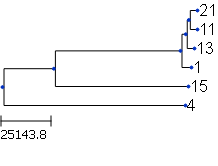

In [1]:
import ecophylo
n = 25 #the number of sampled individuals
com_size = [[5000,10000,50000]] # the size of the assemblage in the past, the first element is the current assemblage size
mu = 0.001 # the point mutation rate
changetime = [[0,700,10000]] # the dates (in generation time) at which the assemblage has changed sizes in the past


tree = ecophylo.simulate(samples = n,
                         com_size= com_size, 
                         mu = mu, 
                         changetime= changetime, seed= 42)

tree.render("%%inline") 


We can then compute summary statistics on the resulting phylogeny. The *getAbund* function allows us to retrieve the number of individuals descending from a speciation event in the genealogy, thus defining the species abundance in the sample at present. 

In [2]:
import numpy as np

abund = ecophylo.getAbund(tree)

shannon = -sum([a/sum(abund)*np.log(a/sum(abund)) for a in abund if a != 0])
simpson = sum([a/sum(abund)**2 for a in abund if a != 0])
invsimpson = 1/simpson

print("Shannon-Weaver index = " + str(shannon))
print("Simpson's diversity index = " + str(simpson))
print("Inverse Simpson's = " + str(invsimpson))


Shannon-Weaver index = 1.6793741045013952
Simpson's diversity index = 0.04
Inverse Simpson's = 25.0


These summary statistics can then be used to compare different eco-evolutionary scenarios having yielded different patterns of extant community composition. 

## Simulating multi-species population structure and history 

*write some stuff here*


### Multiple demes linked by migration

*write some more stuff here*


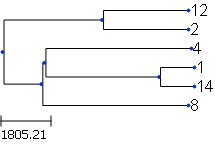

In [3]:
samples = [5, 10] # the number of sampled individuals in each deme
com_size = [[1000,2500],[4000,5000,6000]] # the sizes of the demes in the past, again the first element should be the present deme size
changetime = [[0,100], [0,300,400]] # the dates in the past (in generation time) at wich each demes has changed size

migr = [1, 0.5, 0.8, 0.7] # the symmetric migration rates between demes in the past, the first element is the current migration rate
migr_time = [0, 100, 200, 300] # the dates in the past (in generation time) at which the symmetrc migration rate has changed

tree = ecophylo.simulate(samples = samples,
                         com_size= com_size, 
                         mu = mu, 
                         changetime= changetime,
                         migr = migr,
                         migr_time = migr_time, seed= 42)

tree.render("%%inline") 

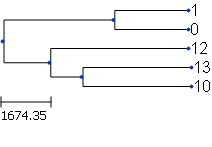

In [4]:
samples = [5, 10] # the number of sampled individuals in each deme
com_size = [[1000,2500],[4000,5000,6000]] # the sizes of the demes in the past, again the first element should be the present deme size
changetime = [[0,100], [0,300,400]] # the dates in the past (in generation time) at wich each demes has changed size

migr = [[[0,0.1],
        [0.2,0]]
        ,
        [[0,0.3],
        [0.4,0]]
        ,
        [[0,0.5],
        [0.6,0]]
        ,
        [[0,0.7],
        [0.6,0]]] # the migration matrixes between demes in the past, the first element is the current migration matrix

migr_time = [0, 100, 200, 300] # the dates in the past (in generation time) at which the migration rate has changed

tree = ecophylo.simulate(samples = samples,
                         com_size= com_size, 
                         mu = mu, 
                         changetime= changetime,
                         migr = migr,
                         migr_time = migr_time, seed= 42)

tree.render("%%inline") 

### Simulating vicariance events

*write some stuff here*


In [5]:
samples = [3,3,3]
com_size = [[200], [200, 300, 400], [200]]
change_time = [[0], [0, 1000, 2000], [0]]
vic_events = [[1000, [0,1], 1],
              [2000, [1,2], 1]]

tree = ecophylo.simulate(samples = samples,
                         com_size= com_size, 
                         mu = mu, 
                         changetime= change_time,
                         vic_events = vic_events, seed= 42)

ValueError: Trying to merge with inactive deme